## Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec
import os

pd.options.display.max_columns = 999
pd.options.display.float_format = "{:.2f}".format

### Read Data

Put the *Global_Cybersecurity_Threats_2015-2024.csv* into your folder and read them using pandas.

In [2]:
file_name =  'Global_Cybersecurity_Threats_2015-2024.csv'

df = pd.read_csv(file_name)

df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


Dictionary:

* Country: where the cyber attack occurred
* Year: The year the attack was reported
* Attack Type: The method or category of the cyber attack
* Target Industry: The industry sector targeted by the attack.
* Financial Loss (in Million $): Estimated monetary damage caused by the attack (in millions of USD).
* Number of Affected Users: Total individuals/organizations impacted by the attack.
* Attack Source: Origin of the attack (e.g., hacker group, nation-state, or insider threat).
* Security Vulnerability Type: The weakness exploited in the attack (e.g., software flaw, misconfiguration).
* Defense Mechanism Used: Countermeasures deployed to mitigate the attack (if any).
* Incident Resolution Time (in Hours): Time taken to resolve the attack (from detection to containment).


## Data Understanding

Inspect if there is any NULL in the data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


Convert *emp_id* into string since it's not an actual number

In [4]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Country                              3000 non-null   object        
 1   Year                                 3000 non-null   datetime64[ns]
 2   Attack Type                          3000 non-null   object        
 3   Target Industry                      3000 non-null   object        
 4   Financial Loss (in Million $)        3000 non-null   float64       
 5   Number of Affected Users             3000 non-null   int64         
 6   Attack Source                        3000 non-null   object        
 7   Security Vulnerability Type          3000 non-null   object        
 8   Defense Mechanism Used               3000 non-null   object        
 9   Incident Resolution Time (in Hours)  3000 non-null   int64         
dtypes: datetime6

In [6]:
df.describe()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000,3000.00,3000.00,3000.00
mean,2019-07-28 09:28:19.200000,50.49,504684.14,36.48
min,2015-01-01 00:00:00,0.50,424.00,1.00
25%,2017-01-01 00:00:00,25.76,255805.25,19.00
50%,2020-01-01 00:00:00,50.80,504513.00,37.00
75%,2022-01-01 00:00:00,75.63,758088.50,55.00
max,2024-01-01 00:00:00,99.99,999635.00,72.00
std,NaN,28.79,289944.08,20.57


In [7]:
df.isna().sum()

,0
Country,0
Year,0
Attack Type,0
Target Industry,0
Financial Loss (in Million $),0
Number of Affected Users,0
Attack Source,0
Security Vulnerability Type,0
Defense Mechanism Used,0
Incident Resolution Time (in Hours),0


In [8]:
df.isnull().sum()

,0
Country,0
Year,0
Attack Type,0
Target Industry,0
Financial Loss (in Million $),0
Number of Affected Users,0
Attack Source,0
Security Vulnerability Type,0
Defense Mechanism Used,0
Incident Resolution Time (in Hours),0


In [9]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)

Index(['Financial Loss (in Million $)', 'Number of Affected Users',
       'Incident Resolution Time (in Hours)'],
      dtype='object')


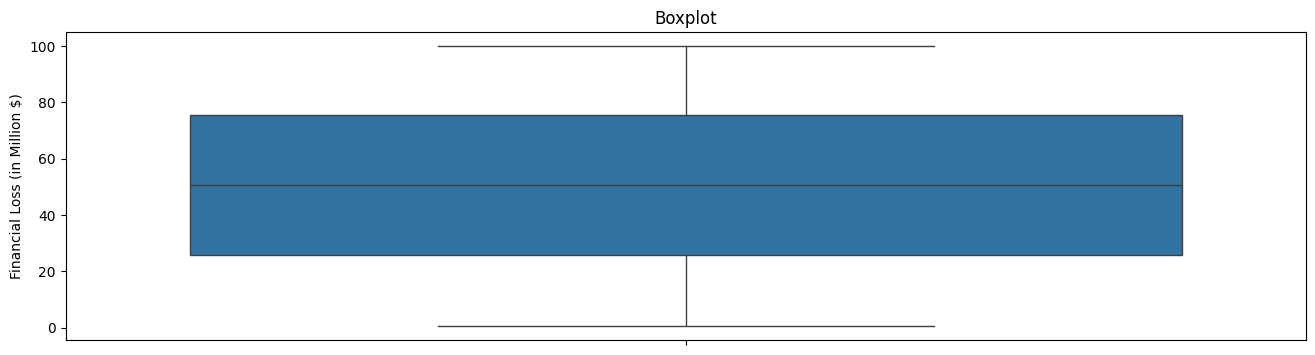

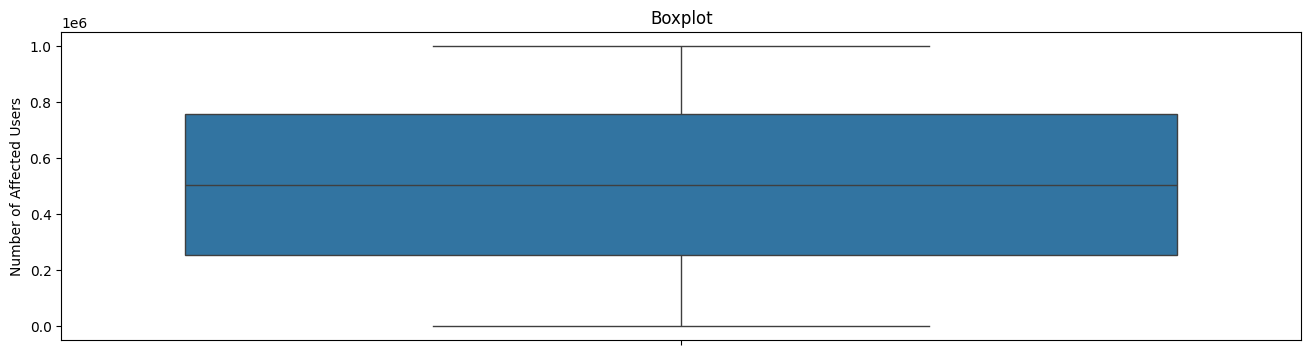

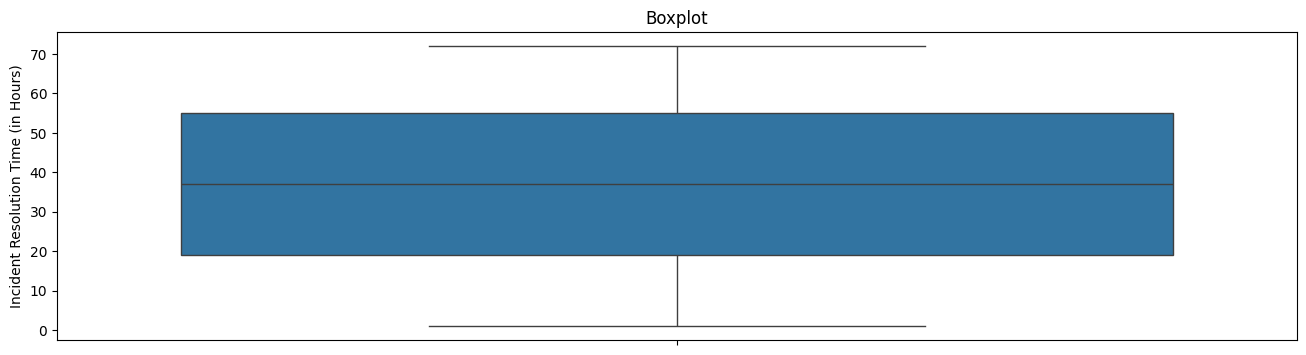

In [11]:
# Untuk Memperlihatkan grafik Sebelum Outlier di Handling
def check_plot(df, variable):

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # box plot
    plt.subplot
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

for col in numeric_cols:
  check_plot(df, col)

In [12]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}: {len(outliers)}")

Outliers in Financial Loss (in Million $): 0
Outliers in Number of Affected Users: 0
Outliers in Incident Resolution Time (in Hours): 0


Based on the boxplot, there are no extreme outliers in the numerical columns.

### Correlation Matrix

Understanding the correlation between numeric variables can be easily visualzied using a matrix.

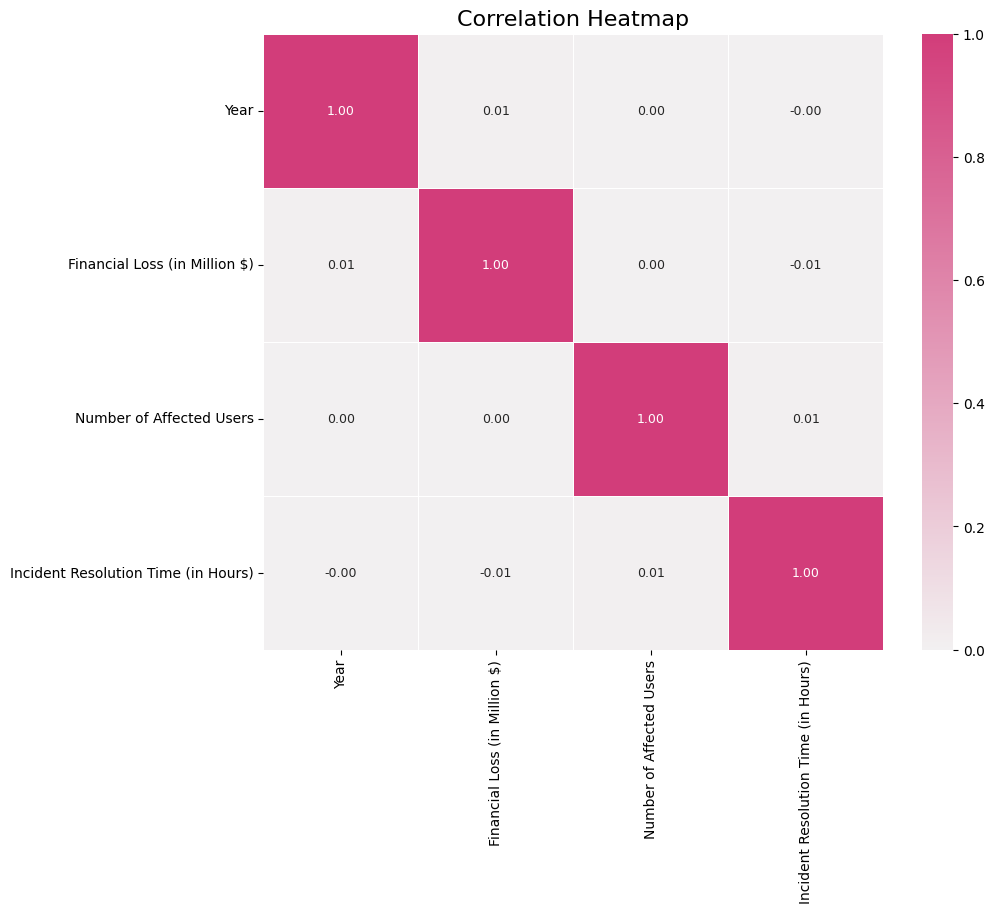

In [13]:
# Compute the correlation matrix
correlation_matrix = df.select_dtypes(exclude='object').corr()

# Create custom pink colormap
pink_cmap = sns.light_palette("#d23d7a", as_cmap=True)  # Dark pink base

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            cmap=pink_cmap,
            vmin=0,
            vmax=1,
            annot=True,
            fmt=".2f",
            annot_kws={"fontsize": 9},
            linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()

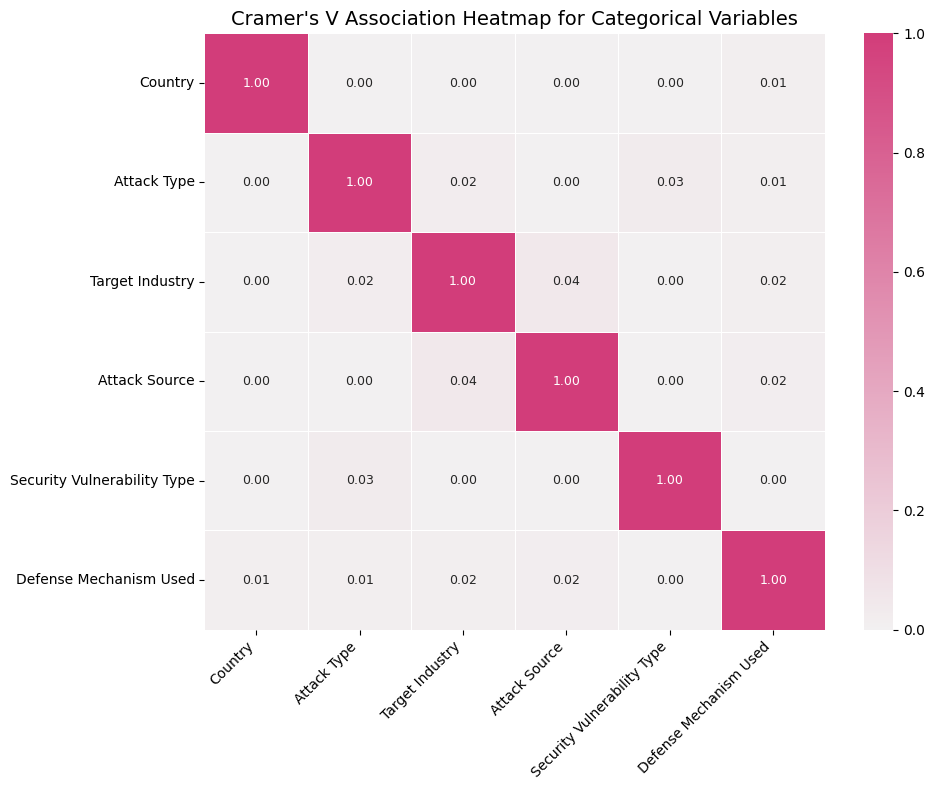

In [14]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """Calculate Cramér's V statistic for categorical-categorical association"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Select only object/categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Initialize correlation matrix
corr_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

# Calculate Cramér's V for each pair
for col1 in cat_cols:
    for col2 in cat_cols:
        corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convert to float
corr_matrix = corr_matrix.astype(float)

# Create custom pink colormap
pink_cmap = sns.light_palette("#d23d7a", as_cmap=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            cmap=pink_cmap,
            vmin=0,
            vmax=1,
            annot=True,
            fmt=".2f",
            annot_kws={"fontsize": 9},
            linewidths=0.5)

plt.title("Cramer's V Association Heatmap for Categorical Variables", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
# Save Data
df.to_csv('cybersecurity_threats.csv', index=False)